In [18]:
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt

In [19]:
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
from os import listdir

In [29]:
damagepath = "/code/Project2/COE379L-Project2/damage"
nodamagepath = "/code/Project2/COE379L-Project2/no_damage"

X = []
y = []

# Load damaged images and convert to black and white
for img_name in os.listdir(damagepath):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(damagepath, img_name)
        img = load_img(img_path)
        img_gray = img.convert('L')
        img_array = img_to_array(img_gray)
        X.append(img_array)
        y.append(1)

# Load non-damaged images
for img_name in os.listdir(nodamagepath):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(nodamagepath, img_name)
        img = load_img(img_path)
        img_gray = img.convert('L')
        img_array = img_to_array(img_gray)
        X.append(img_array)
        y.append(0) 

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print("Loaded images:", X.shape)
print("Labels:", y.shape)

Loaded images: (21322, 128, 128, 1)
Labels: (21322,)


In [32]:
# There are total of 21322 images, each 128 by 128 and are noy grayscale
print("Total images:", X.shape)
print("Total labels:", y.shape)

Total images: (21322, 128, 128, 1)
Total labels: (21322,)


In [8]:
print("Image shape (Height x Width x Channels):", X[0].shape)
print("All image shapes unique:", np.unique([img.shape for img in X], axis=0))

Image shape (Height x Width x Channels): (128, 128, 1)
All image shapes unique: [[128 128   1]]


In [9]:
print("Min pixel value:", X.min())
print("Max pixel value:", X.max())

Min pixel value: 0.0
Max pixel value: 255.0


Displaying first 5 training images:
Image Label: [1 0 1 1 1]
1 = damage, 0 = no damage


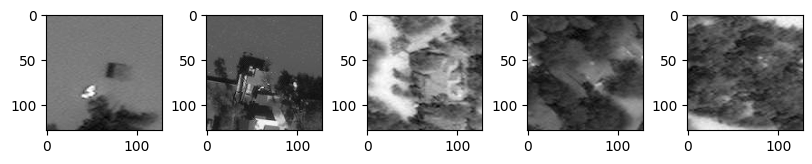

In [36]:
import matplotlib.pyplot as plt

# Plot for visualization of the image
plt.figure(figsize=(10, 1.5)) 
print("Displaying first 5 training images:")
for i in range(5):
    image_2d = X_train[i].reshape(128, 128)
    plt.subplot(1, 5, i+1)
    plt.imshow(image_2d, cmap="gray")
print('Image Label: %s' % (y_train[0:5]))
print("1 = damage, 0 = no damage")

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43, stratify = y)

In [22]:
# Now I will scale the image to a 1D array and Normalize the Data
image_vector_size = 128 * 128
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0


In [23]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# Here we map all the inputs to every perceptron creating a dense layer while also having 128*128 + 1 paramaters in the first layer
model.add(Dense(256, input_dim=image_vector_size, activation='relu'))

# Here we create another dense layer except with less perceptrons
model.add(Dense(128, activation='relu'))

# Here we create another dense layer except with less perceptrons
model.add(Dense(64, activation='relu'))

# This is the output layer. The reason it only has 1 perceptron is because we are considering 0 to be 
# a non-destructed building and 1 to be a destructed building
model.add(Dense(1, activation='sigmoid'))

In [24]:
from keras.callbacks import EarlyStopping
# Creating an early stopping condition for the model
# This helps optimize the model
# In this case we look at val_loss (monitor)
# min_delta tells you the improvement required to not stop (.5 = if the epoch results in val_loss improving by < .5, then flag)
# patience tells us how long to continue doing epochs in a row if the flag is raised (flag not raising x times in a row). it then quits
# start_from_epoch tells us when to consider the early stopping
# restore_best_weights tells us to go to the best epoch when done
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=0, start_from_epoch=5, restore_best_weights=True, verbose=1)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_normalized, y_train, validation_split=0.2, epochs=30, batch_size=4, verbose=2, callbacks=[early_stopping])

Epoch 1/30
3412/3412 - 99s - loss: 0.6729 - accuracy: 0.6579 - val_loss: 0.6459 - val_accuracy: 0.6527 - 99s/epoch - 29ms/step
Epoch 2/30
3412/3412 - 97s - loss: 0.6364 - accuracy: 0.6676 - val_loss: 0.6475 - val_accuracy: 0.6527 - 97s/epoch - 29ms/step
Epoch 3/30
3412/3412 - 101s - loss: 0.6367 - accuracy: 0.6676 - val_loss: 0.6470 - val_accuracy: 0.6527 - 101s/epoch - 30ms/step
Epoch 4/30
3412/3412 - 98s - loss: 0.6364 - accuracy: 0.6676 - val_loss: 0.6461 - val_accuracy: 0.6527 - 98s/epoch - 29ms/step
Epoch 5/30
3412/3412 - 89s - loss: 0.6365 - accuracy: 0.6676 - val_loss: 0.6464 - val_accuracy: 0.6527 - 89s/epoch - 26ms/step
Epoch 6/30
3412/3412 - 90s - loss: 0.6361 - accuracy: 0.6676 - val_loss: 0.6486 - val_accuracy: 0.6527 - 90s/epoch - 26ms/step
Epoch 7/30
3412/3412 - 91s - loss: 0.6365 - accuracy: 0.6676 - val_loss: 0.6460 - val_accuracy: 0.6527 - 91s/epoch - 27ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 7.
3412/3412 - 94s - loss: 0.6363 - accura

In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.6380255222320557
Test Accuracy: 0.6644783020019531


In [10]:
# CNN LeNet-5
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam

# For the CNN reshape the inputs as it will be flattened in the ANN
X_train_cnn = X_train_normalized.reshape(-1, 128, 128, 1)
X_test_cnn = X_test_normalized.reshape(-1, 128, 128, 1)

model_cnn = Sequential()
# Convolutional layer with 6 filters of size 5x5
model_cnn.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(128, 128, 1)))
model_cnn.add(AveragePooling2D(pool_size=(2, 2), padding = 'same'))

# Convolutional layer with 16 filters of size 5x5
model_cnn.add(Conv2D(16, kernel_size=(5, 5), activation='relu',))
model_cnn.add(AveragePooling2D(pool_size=(2, 2), padding = 'same'))

# Flatten the feature maps to feed into the ANN
model_cnn.add(Flatten())

model_cnn.add(Dense(120, activation='relu'))

model_cnn.add(Dense(84, activation='relu'))

# Fully connected layer with num_classes neurons 
model_cnn.add(Dense(1, activation='sigmoid'))

Displaying first 5 training images:
Image Label: [1 0 1 1 1]
1 = damage, 0 = no damage


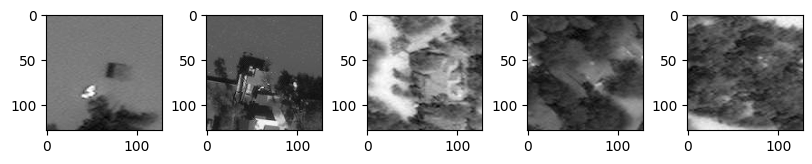

In [37]:
import matplotlib.pyplot as plt
# See if the reshape was successful
plt.figure(figsize=(10, 1.5)) 
print("Displaying first 5 training images:")
for i in range(5):
    image_2d = X_train_cnn[i].reshape(128, 128)
    plt.subplot(1, 5, i+1)
    plt.imshow(image_2d, cmap="gray")
print('Image Label: %s' % (y_train[0:5]))
print("1 = damage, 0 = no damage")

In [12]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=0, start_from_epoch=5, restore_best_weights=True, verbose=1)
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train, validation_split=0.2, epochs=15, batch_size=120, verbose=2, callbacks=[early_stopping])

Epoch 1/15
114/114 - 32s - loss: 0.5835 - accuracy: 0.7115 - val_loss: 0.4681 - val_accuracy: 0.7661 - 32s/epoch - 281ms/step
Epoch 2/15
114/114 - 34s - loss: 0.4198 - accuracy: 0.8280 - val_loss: 0.3909 - val_accuracy: 0.8388 - 34s/epoch - 294ms/step
Epoch 3/15
114/114 - 33s - loss: 0.3488 - accuracy: 0.8607 - val_loss: 0.3263 - val_accuracy: 0.8716 - 33s/epoch - 292ms/step
Epoch 4/15
114/114 - 34s - loss: 0.2927 - accuracy: 0.8813 - val_loss: 0.3333 - val_accuracy: 0.8722 - 34s/epoch - 301ms/step
Epoch 5/15
114/114 - 32s - loss: 0.2362 - accuracy: 0.9058 - val_loss: 0.2295 - val_accuracy: 0.9091 - 32s/epoch - 285ms/step
Epoch 6/15
114/114 - 33s - loss: 0.2045 - accuracy: 0.9208 - val_loss: 0.2292 - val_accuracy: 0.9109 - 33s/epoch - 293ms/step
Epoch 7/15
Restoring model weights from the end of the best epoch: 6.
114/114 - 32s - loss: 0.1790 - accuracy: 0.9306 - val_loss: 0.2587 - val_accuracy: 0.8980 - 32s/epoch - 282ms/step
Epoch 7: early stopping


In [13]:
# Fit to the test data and analyze accuracy
test_loss, test_accuracy = model_cnn.evaluate(X_test_cnn, y_test, verbose = 0)
print(f"Accuracy on the Test: {test_accuracy}")
print(f"Test loss: {test_loss}")

Accuracy on the Test: 0.9144197106361389
Test loss: 0.2294180989265442


In [14]:
# Building the Alternate-Lenet-5 CNN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_alternate = Sequential()

model_alternate.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)))
model_alternate.add(MaxPooling2D(pool_size=(2, 2)))
                    
model_alternate.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model_alternate.add(MaxPooling2D(pool_size=(2, 2)))
                    
model_alternate.add(Conv2D(128, kernel_size=(3, 3), activation = 'relu'))
model_alternate.add(MaxPooling2D(pool_size=(2, 2)))
                    
model_alternate.add(Conv2D(128, kernel_size=(3, 3), activation = 'relu'))
model_alternate.add(MaxPooling2D(pool_size=(2, 2)))

model_alternate.add(Flatten())
model_alternate.add(Dropout(0.5))

model_alternate.add(Dense(512, activation='relu'))
# Fully connected layer with num_classes neurons 
model_alternate.add(Dense(1, activation='sigmoid'))

In [15]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# For the CNN reshape the inputs as it will be flattened in the ANN
X_train_cnn = X_train_normalized.reshape(-1, 128, 128, 1)
X_test_cnn = X_test_normalized.reshape(-1, 128, 128, 1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=0, start_from_epoch=5, restore_best_weights=True, verbose=1)
model_alternate.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_alternate.fit(X_train_cnn, y_train, validation_split=0.2, epochs=15, batch_size=120, verbose=2, callbacks = [early_stopping])

Epoch 1/15
114/114 - 94s - loss: 0.5239 - accuracy: 0.7450 - val_loss: 0.3822 - val_accuracy: 0.8306 - 94s/epoch - 828ms/step
Epoch 2/15
114/114 - 93s - loss: 0.2525 - accuracy: 0.8951 - val_loss: 0.2259 - val_accuracy: 0.9056 - 93s/epoch - 819ms/step
Epoch 3/15
114/114 - 94s - loss: 0.1767 - accuracy: 0.9287 - val_loss: 0.1548 - val_accuracy: 0.9370 - 94s/epoch - 823ms/step
Epoch 4/15
114/114 - 94s - loss: 0.1607 - accuracy: 0.9365 - val_loss: 0.1494 - val_accuracy: 0.9346 - 94s/epoch - 822ms/step
Epoch 5/15
114/114 - 94s - loss: 0.1403 - accuracy: 0.9450 - val_loss: 0.1501 - val_accuracy: 0.9338 - 94s/epoch - 824ms/step
Epoch 6/15
114/114 - 91s - loss: 0.1344 - accuracy: 0.9458 - val_loss: 0.1615 - val_accuracy: 0.9302 - 91s/epoch - 794ms/step
Epoch 7/15
114/114 - 94s - loss: 0.1181 - accuracy: 0.9521 - val_loss: 0.1356 - val_accuracy: 0.9513 - 94s/epoch - 823ms/step
Epoch 8/15
114/114 - 92s - loss: 0.1159 - accuracy: 0.9538 - val_loss: 0.1083 - val_accuracy: 0.9540 - 92s/epoch - 809

In [16]:
# Test set validation
test_loss, test_accuracy = model_alternate.evaluate(X_test_cnn, y_test, verbose = 0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.10940542817115784
Test accuracy: 0.9573270678520203


In [17]:
# Save the Alternative to disc as it is the best model
model_alternate.save("alternate_lenet5_model.keras")